In [162]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [163]:
air_reserve = pd.read_csv("data/kaggle/air_reserve.csv")
air_visit_data = pd.read_csv("data/kaggle/air_visit_data.csv")
air_store_info = pd.read_csv("data/kaggle/air_store_info.csv") # not using for now
hpg_reserve = pd.read_csv("data/kaggle/hpg_reserve.csv")
hpg_store_info = pd.read_csv("data/kaggle/hpg_store_info.csv") # not using for now
store_id_relation = pd.read_csv("data/kaggle/store_id_relation.csv")
date_info = pd.read_csv("data/kaggle/date_info.csv")

In [164]:
air_visit_data['visit_date'] = pd.to_datetime(air_visit_data['visit_date']).dt.date
air_visit_data.head()

,air_store_id,visit_date,visitors
0,air_ba937bf13d40fb24,2016-01-13,25
1,air_ba937bf13d40fb24,2016-01-14,32
2,air_ba937bf13d40fb24,2016-01-15,29
3,air_ba937bf13d40fb24,2016-01-16,22
4,air_ba937bf13d40fb24,2016-01-18,6


In [165]:
distinct_store_ids = air_visit_data['air_store_id'].unique()
print(len(distinct_store_ids))
#distinct_store_ids
air_distinct_store_ids = distinct_store_ids

829


In [166]:
# time series range of given data
date_range = pd.date_range('2016-01-01', '2017-05-31')
date_range

DatetimeIndex(['2016-01-01', '2016-01-02', '2016-01-03', '2016-01-04',
               '2016-01-05', '2016-01-06', '2016-01-07', '2016-01-08',
               '2016-01-09', '2016-01-10',
               ...
               '2017-05-22', '2017-05-23', '2017-05-24', '2017-05-25',
               '2017-05-26', '2017-05-27', '2017-05-28', '2017-05-29',
               '2017-05-30', '2017-05-31'],
              dtype='datetime64[ns]', length=517, freq='D')

In [167]:
# to make date_info appendable
date_info.index = pd.DatetimeIndex(date_info['calendar_date'])
del date_info['calendar_date']
date_info.head()

,day_of_week,holiday_flg
calendar_date,,
2016-01-01,Friday,1
2016-01-02,Saturday,1
2016-01-03,Sunday,1
2016-01-04,Monday,0
2016-01-05,Tuesday,0


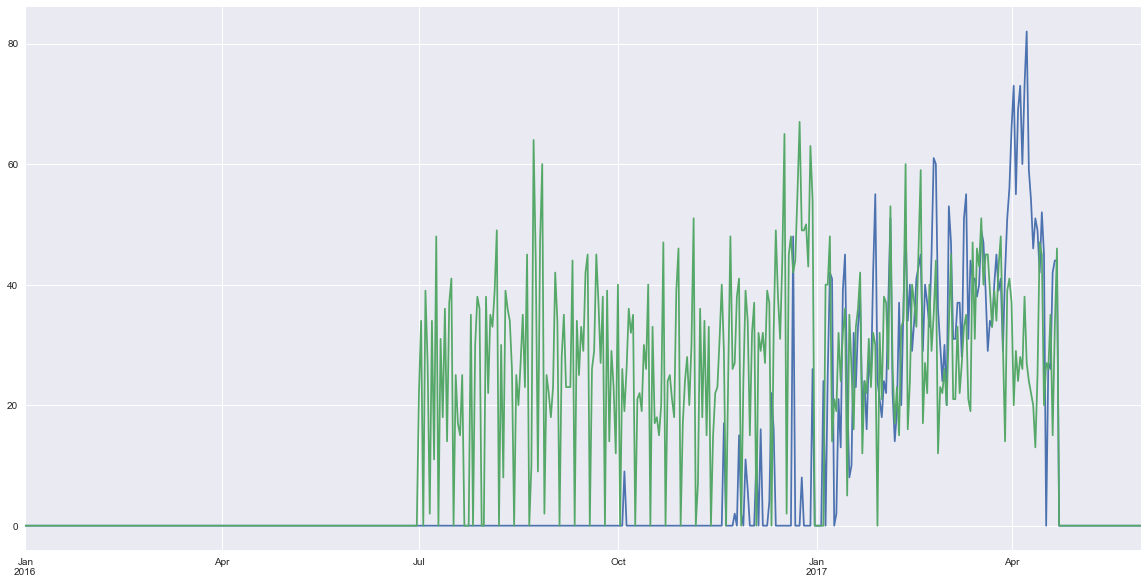

In [168]:
# function to determine overall footfall at each restraunt, that then can be used for time-series modelling
def store_wise_analysis(data, data_source, store_id, predict_for_date, date_range, date_info):
    store_data = data[data[data_source+"_store_id"] == store_id]
    modified_data = store_data.sort_values(by = ['visit_date']).groupby(['visit_date']).visitors.sum()
    modified_data.index = pd.DatetimeIndex(modified_data.index)
    ts_data = modified_data.reindex(date_range, fill_value=0)
    ts_data.plot(figsize = (20,10))
    combined_data = pd.DataFrame(ts_data)
    combined_data['day_of_week'] = date_info['day_of_week'].astype('category') #.cat.codes
    combined_data['holiday_flg'] = date_info['holiday_flg']
    # print(ts_data)
    # return ts_data
    # print(combined_data)
    return combined_data
    
t1 = store_wise_analysis(data=air_visit_data, data_source='air', store_id = distinct_store_ids[51], predict_for_date = None, 
                         date_range=date_range, date_info=date_info)
t2 = store_wise_analysis(data=air_visit_data, data_source='air', store_id = distinct_store_ids[101],predict_for_date = None, 
                         date_range=date_range, date_info=date_info)

In [169]:
air_reserve['visit_date'] = pd.to_datetime(air_reserve['visit_datetime']).dt.date
air_reserve.columns = ['air_store_id', 'visit_datetime', 'reserve_datetime', 'visitors', 'visit_date']
del air_reserve['visit_datetime'], air_reserve['reserve_datetime']
air_reserve.head()

,air_store_id,visitors,visit_date
0,air_877f79706adbfb06,1,2016-01-01
1,air_db4b38ebe7a7ceff,3,2016-01-01
2,air_db4b38ebe7a7ceff,6,2016-01-01
3,air_877f79706adbfb06,2,2016-01-01
4,air_db80363d35f10926,5,2016-01-01


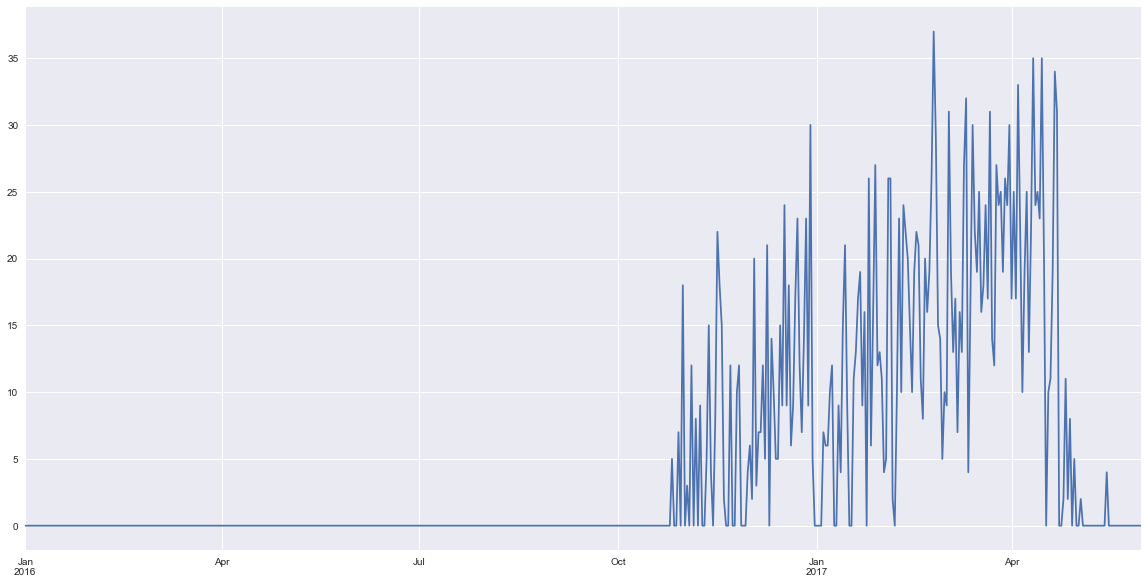

In [170]:
# using store_wise_analysis function to get timeseries data
t3 = store_wise_analysis(data=air_reserve, data_source='air', store_id = distinct_store_ids[51], predict_for_date = None,
                         date_range=date_range, date_info=date_info)

In [171]:
#g = air_reserve.groupby(['air_store_id', 'visit_date'])['visitors'].sum()
#for store_id, df in g:
#    print(store_id)
#    print(df)
#g.count()

In [172]:
hpg_reserve['visit_date'] = pd.to_datetime(hpg_reserve['visit_datetime']).dt.date # since no actual visit count given, assuming
                                                                                  # reserved count = visit count 
hpg_reserve.columns = ['hpg_store_id', 'visit_datetime', 'reserve_datetime', 'visitors', 'visit_date']
del hpg_reserve['visit_datetime'], hpg_reserve['reserve_datetime']
# hpg_reserve.columns = ['hpg_store_id', 'visitors', 'visit_date']
hpg_reserve.head()

,hpg_store_id,visitors,visit_date
0,hpg_c63f6f42e088e50f,1,2016-01-01
1,hpg_dac72789163a3f47,3,2016-01-01
2,hpg_c8e24dcf51ca1eb5,2,2016-01-01
3,hpg_24bb207e5fd49d4a,5,2016-01-01
4,hpg_25291c542ebb3bc2,13,2016-01-01


In [173]:
hpg_distinct_store_ids = hpg_reserve['hpg_store_id'].unique()
print(len(hpg_distinct_store_ids))
#distinct_store_ids

13325


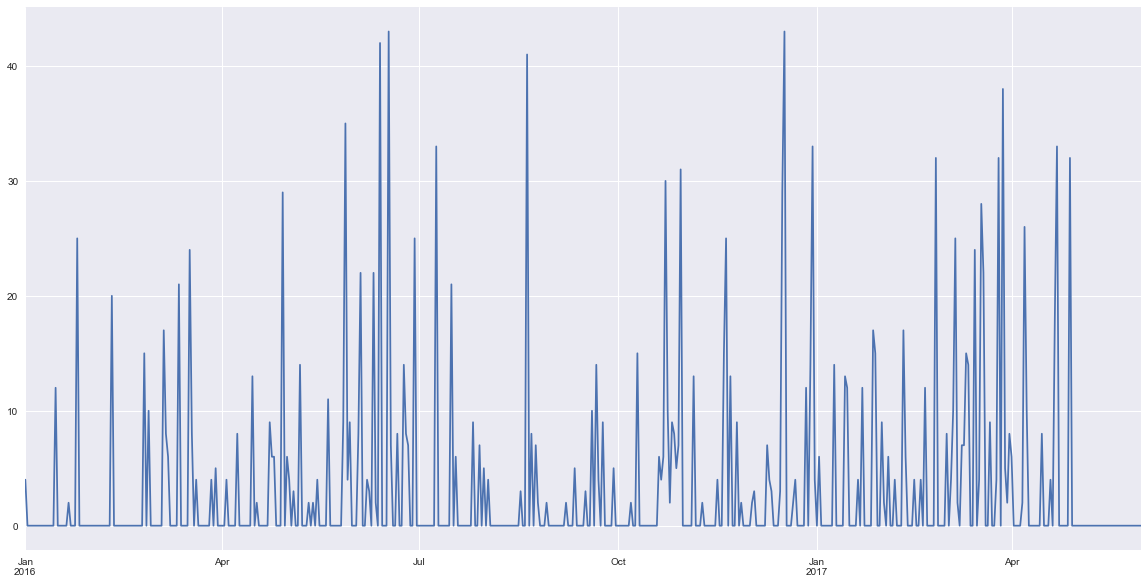

In [174]:
# using store_wise_analysis function to get timeseries data
t4 = store_wise_analysis(data=hpg_reserve, data_source='hpg', store_id = hpg_distinct_store_ids[51], predict_for_date = None,
                         date_range=date_range,date_info=date_info)

In [175]:
# use store_id_relation csv file
# relate stores first then compute commonality

common_stores_list = []
air_mutex_stores_list = []
hpg_mutex_stores_list = []
for i in air_distinct_store_ids:
    if i in hpg_distinct_store_ids:
        common_stores_list.append(i)
    elif i not in hpg_distinct_store_ids:
        air_mutex_stores_list.append(i)
for i in hpg_distinct_store_ids:
    if i not in air_distinct_store_ids:
        hpg_mutex_stores_list.append(i)

In [176]:
print(common_stores_list)

[]


In [177]:
store_id_relation.head()

,air_store_id,hpg_store_id
0,air_63b13c56b7201bd9,hpg_4bc649e72e2a239a
1,air_a24bf50c3e90d583,hpg_c34b496d0305a809
2,air_c7f78b4f3cba33ff,hpg_cd8ae0d9bbd58ff9
3,air_947eb2cae4f3e8f2,hpg_de24ea49dc25d6b8
4,air_965b2e0cf4119003,hpg_653238a84804d8e7


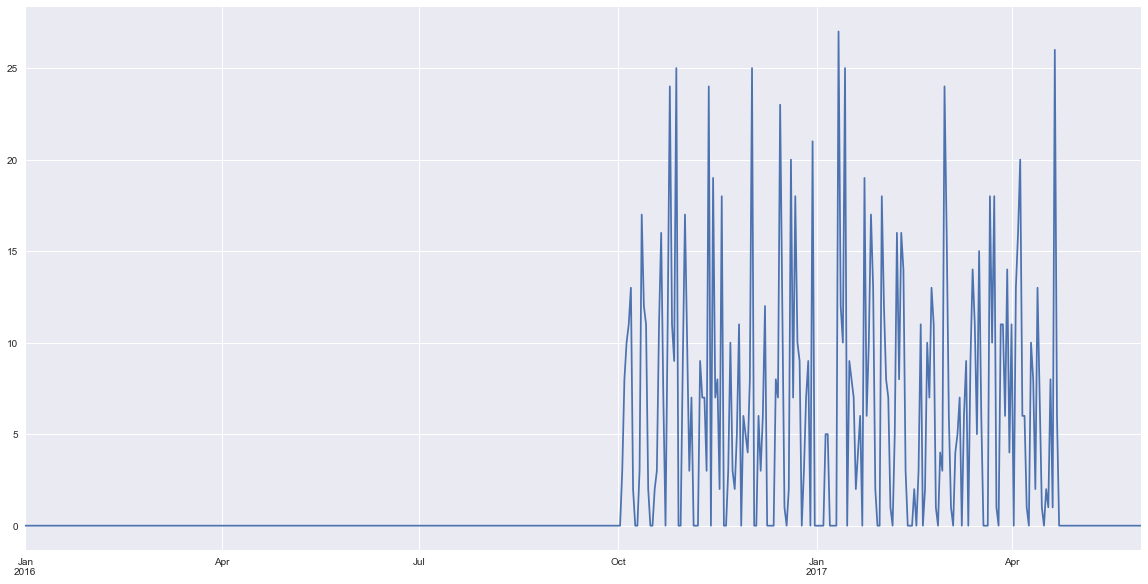

In [178]:
t = store_wise_analysis(data=air_visit_data, data_source='air', store_id = 'air_0164b9927d20bcc3', predict_for_date = None,
                         date_range=date_range,date_info=date_info)

# Time Series Modelling

In [179]:
df = t
df.head()

,visitors,day_of_week,holiday_flg
2016-01-01,0,Friday,1
2016-01-02,0,Saturday,1
2016-01-03,0,Sunday,1
2016-01-04,0,Monday,0
2016-01-05,0,Tuesday,0


In [180]:
from statsmodels.tsa import stattools
import statsmodels.api as sm
import statsmodels

STEPS: Cross sectional Time Series Data?
1. Check for white noise (mean=0, variance=constant, co-variance = constant / correlation = 0) -No prediction possible (Average)

Univariate Analysis:
	1. Auto-correlation Function (ACF) - lags are continuos
	2. Partial Auto-correlation Function (PACF) - lags are not continuos
		= to check how many lags to consider for the Model (PLOT CORRELOGRAM)
		
1. ACF - to determine MA models
2. PACF - to determine AR models

REMOVING TREND METHODS - 1. local smoothing (window mean substraction from each values) or
                         2. linear regression
                         3. Log - Difference method (simplest, rough)
REMOVING SEASONALITY - 1. Additive (varaince fixed)
                       2. Multiplicative (variance time dependent, increasing or decreasing)
                       REMOVAL METHODS:
                           1. Average de-trended values for specific season
                           2. use 'loess' method (locally weighted scatterplot smoothing)

2. Check Strictly Stationarity? (implies mean, variance ( or acf) and co-variance are time invariant) (Note: If time series is not stationary, use DIFFERENCing n times (or monotonic one-to-one, reversible)  to make it stationary, I in ARIMA)
3. MA Model (forecasting with past errors only)
4. AR Model (forecasting with past values of LAGS) 
5. Check for (weakly stationary, covariance stationary etc), SARIMA, ARIMAX, Vectorized AR etc.?



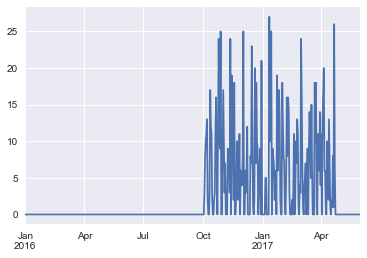

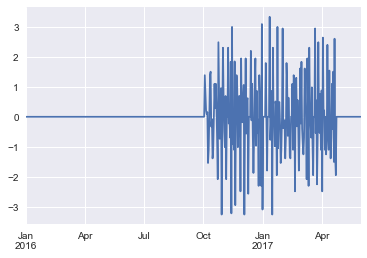

In [181]:
df['visitors'].plot()
plt.show()

# removing treand (monotonous increase or decrease), if any

visitors = df['visitors']
log_visitors = np.log(visitors + 1) # added 1 to avoid divide by zero scenario
log_visitors_diff = log_visitors - log_visitors.shift()
log_visitors_diff.plot()
df['visitors'] = log_visitors_diff

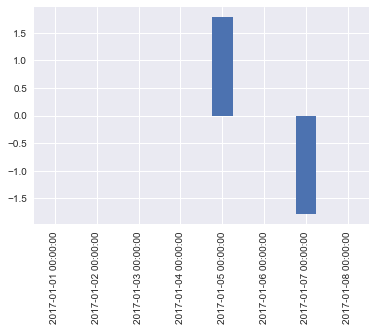

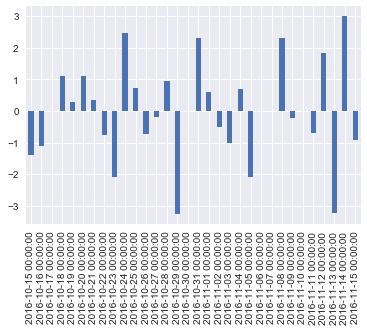

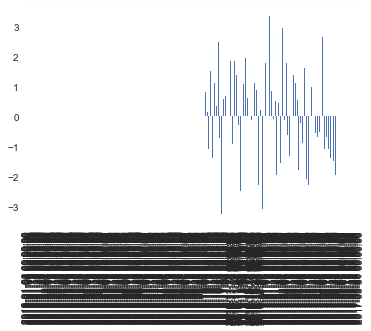

In [182]:
# informal exploration (checking for seasonality - MONTHLY, WEEKLY, YEARLY(Not enough data here))

df['2017-01-01':'2017-01-08']['visitors'].plot(kind='bar') #weekly
plt.show()
df['2016-10-15':'2016-11-15']['visitors'].plot(kind='bar') #monthly
plt.show()
df['2016-01-01':'2017-05-31']['visitors'].plot(kind='bar') #yearly (not enough data, not useful here)
plt.show()

[]

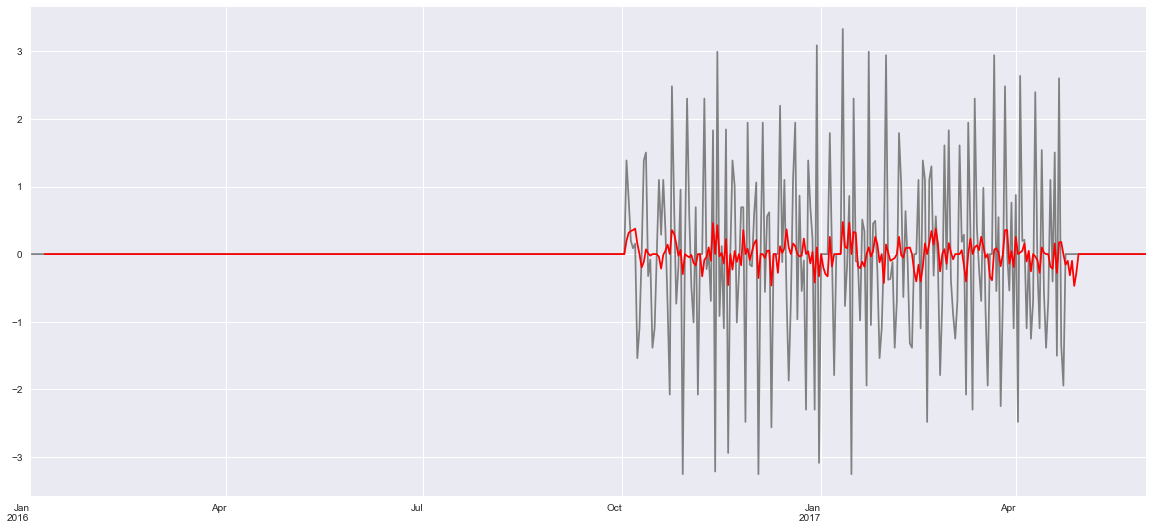

In [183]:
# handling seasonality using simple average of the season method
# rolling window analysis, calculating mean
r = df['visitors'].rolling(window = 7) # weekly
df['visitors'].plot(color = 'gray',figsize = (20,10), subplots=True)
r.mean().plot(color = 'red')
#r.var()['visitors'].plot(color = 'green')
plt.plot()

# r = df.rolling(window = 31) # monthly
# df['visitors'].plot(color = 'gray',figsize = (20,10), subplots=True)
# r.mean()['visitors'].plot(color = 'yellow')
# r.var()['visitors'].plot(color = 'blue')
# plt.plot()

In [192]:
df['visitors'] = df['visitors'].fillna(0)
df['visitors']

2016-01-01    0.0
2016-01-02    0.0
2016-01-03    0.0
2016-01-04    0.0
2016-01-05    0.0
2016-01-06    0.0
2016-01-07    0.0
2016-01-08    0.0
2016-01-09    0.0
2016-01-10    0.0
2016-01-11    0.0
2016-01-12    0.0
2016-01-13    0.0
2016-01-14    0.0
2016-01-15    0.0
2016-01-16    0.0
2016-01-17    0.0
2016-01-18    0.0
2016-01-19    0.0
2016-01-20    0.0
2016-01-21    0.0
2016-01-22    0.0
2016-01-23    0.0
2016-01-24    0.0
2016-01-25    0.0
2016-01-26    0.0
2016-01-27    0.0
2016-01-28    0.0
2016-01-29    0.0
2016-01-30    0.0
             ... 
2017-05-02    0.0
2017-05-03    0.0
2017-05-04    0.0
2017-05-05    0.0
2017-05-06    0.0
2017-05-07    0.0
2017-05-08    0.0
2017-05-09    0.0
2017-05-10    0.0
2017-05-11    0.0
2017-05-12    0.0
2017-05-13    0.0
2017-05-14    0.0
2017-05-15    0.0
2017-05-16    0.0
2017-05-17    0.0
2017-05-18    0.0
2017-05-19    0.0
2017-05-20    0.0
2017-05-21    0.0
2017-05-22    0.0
2017-05-23    0.0
2017-05-24    0.0
2017-05-25    0.0
2017-05-26

In [193]:
# doing Augmented Dickey-Fuller Test, to check Stationarity of the data

def test_stationarity(timeseries):
    # Perform Dickey-Fuller test:
    from statsmodels.tsa.stattools import adfuller
    print('Results of Dickey-Fuller Test:')
    print ("==============================================")
    
    dftest = adfuller(timeseries, autolag='AIC')
    
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#lags Used', 'Number of Observations Used'])
    
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    
    print(dfoutput)
#test_stationarity(df['visitors'])
print(statsmodels.tsa.stattools.adfuller(df['visitors']))

(-8.7586636277630578, 2.7114893734776434e-14, 19, 497, {'1%': -3.4435761493506294, '5%': -2.8673729601892251, '10%': -2.5698767442886696}, 981.63903515025004)


In [69]:
# handling the non-stationarity (if any) by taking difference

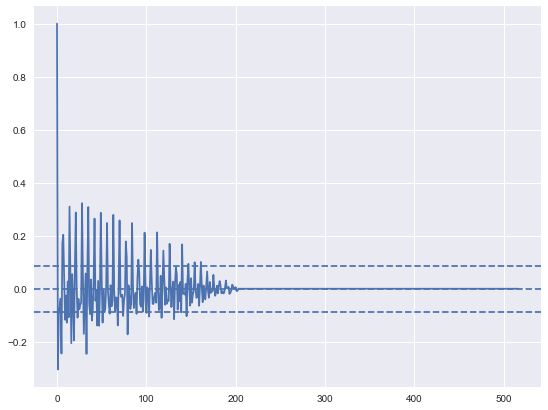

In [197]:
# using 95% confidence interval for ACF (custom plot)

acf_result = stattools.acf(df['visitors'], nlags = 1000)
plt.figure(figsize=(20,7))
plt.subplot(121) 
plt.plot(acf_result)
plt.axhline(y=0,linestyle='--')
plt.axhline(y=-1.96/np.sqrt(len(df['visitors'])),linestyle='--')
plt.axhline(y=1.96/np.sqrt(len(df['visitors'])),linestyle='--')

In [201]:
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(df['visitors'], nlags = 1000)
#lag_pacf = pacf(df['visitors'], nlags = 1000)

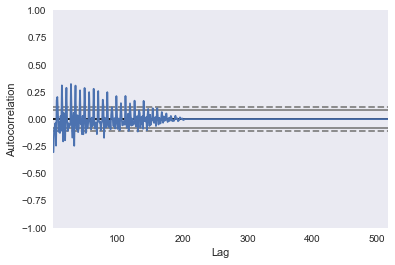

In [195]:
# alternatively (in-built plot)

from pandas.plotting import autocorrelation_plot

autocorrelation_plot(df['visitors'])
plt.show()

# for white noise we can not do the modelling, giving just AVERAGE values is best solution

In [ ]:
# handling seasonality

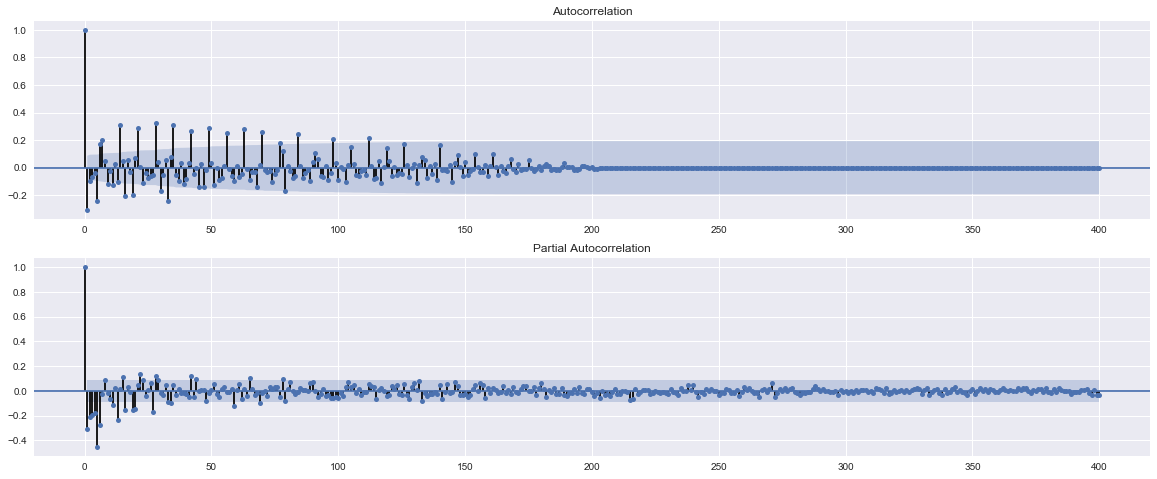

In [206]:
fig = plt.figure(figsize=(20,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['visitors'], lags=400, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['visitors'], lags=400, ax=ax2)
plt.show()

In [212]:
# Grid Search

for p in range(7):
    for d in range(2):
        for q in range(7):
            try:
                arima_mod=sm.tsa.ARIMA(df['visitors'],(p,d,q)).fit(transparams=True)

                x=arima_mod.aic

                x1= p,d,q
                print (x1,x)

                aic.append(x)
                pdq.append(x1)
            except:
                pass
print(aic)

(0, 0, 0) 1315.74321159
(0, 0, 1) 1173.2795494296556
(0, 0, 2) 1137.363487663683
(0, 0, 3) 1137.1483570572518
(0, 1, 0) 1809.05346743
(0, 1, 1) 1322.4414117609474
(1, 0, 0) 1267.5151206503008
(1, 0, 1) 1137.6257241136777
(1, 0, 2) 1138.033192166266
(1, 0, 3) 1131.9136982220175
(1, 0, 4) 1132.7986413048734
(1, 0, 6) 1096.2475160373392
(1, 1, 0) 1599.8681717329418
(2, 0, 0) 1246.7658676056863
(2, 0, 1) 1136.6852958672332
(2, 0, 2) 1127.243575306223
(2, 0, 3) 1053.147618550302
(2, 0, 4) 1053.2423094506173
(2, 0, 6) 1083.0990727156236
(2, 1, 0) 1511.5266302204866


C:\Users\tidyq\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


(2, 1, 6) 1101.9905716917938
(3, 0, 0) 1229.0809592917392
(3, 0, 1) 1129.5571967896801
(3, 0, 2) 1120.6555831162918


C:\Users\tidyq\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


(3, 0, 3) 1053.356251231422


C:\Users\tidyq\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


(3, 0, 4) 1053.9202843352655


C:\Users\tidyq\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


(3, 0, 5) 1052.2449646969642


C:\Users\tidyq\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


(3, 0, 6) 1081.40279922417
(3, 1, 0) 1457.9178424744546
(3, 1, 1) 1237.176007528437


C:\Users\tidyq\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


(3, 1, 6) 1108.8381810869032
(4, 0, 0) 1213.9440195728478
(4, 0, 1) 1118.8775468763658
(4, 0, 2) 1106.6247842490618


C:\Users\tidyq\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


(4, 0, 3) 1055.149584600465


C:\Users\tidyq\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


(4, 0, 4) 1052.737704870981


C:\Users\tidyq\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


(4, 0, 6) 1030.8029308484818
(4, 1, 0) 1454.7536121261503
(4, 1, 1) 1222.380284876955


C:\Users\tidyq\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


(4, 1, 6) 1043.5480837307832
(5, 0, 0) 1099.3463124118325
(5, 0, 1) 1069.5606560508245
(5, 0, 2) 1061.0672609417775
(5, 0, 3) 1060.2726091016075
(5, 0, 4) 1061.1622958849655


C:\Users\tidyq\Anaconda3\lib\site-packages\statsmodels\base\model.py:473: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\tidyq\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


(5, 0, 5) 1030.8011613555861


C:\Users\tidyq\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


(5, 0, 6) 1009.134653614708
(5, 1, 0) 1383.7281241312326
(5, 1, 1) 1108.6309364724743


C:\Users\tidyq\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


(5, 1, 2) 1079.3458165565446
(6, 0, 0) 1061.6606739223148
(6, 0, 1) 1063.445001707926
(6, 0, 2) 1061.680325915008
(6, 0, 3) 1052.8806960739125


C:\Users\tidyq\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


(6, 0, 4) 1060.951171631334
(6, 1, 0) 1268.216116012419


C:\Users\tidyq\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:628: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\Users\tidyq\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:628: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\Users\tidyq\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:629: RuntimeWarning: overflow encountered in exp
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\Users\tidyq\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:629: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\Users\tidyq\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:584: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/
C:\Users\tidyq\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:585: RuntimeWarning: overfl

(6, 1, 2) 1073.165857257017


C:\Users\tidyq\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


(6, 1, 3) 1071.2586544691876
(6, 1, 4) 1072.5980053589944


C:\Users\tidyq\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


NameError: name 'aic' is not defined

C:\Users\tidyq\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                              ARMA Model Results                              
Dep. Variable:               visitors   No. Observations:                  517
Model:                     ARMA(5, 6)   Log Likelihood                -491.567
Method:                       css-mle   S.D. of innovations              0.623
Date:                Wed, 31 Jan 2018   AIC                           1009.135
Time:                        17:50:21   BIC                           1064.359
Sample:                    01-01-2016   HQIC                          1030.774
                         - 05-31-2017                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const           -4.58e-05      0.005     -0.008      0.993      -0.011       0.011
ar.L1.visitors    -0.1916      0.017    -11.543      0.000      -0.224      -0.159
ar.L2.visitors    -0.6391      0.015

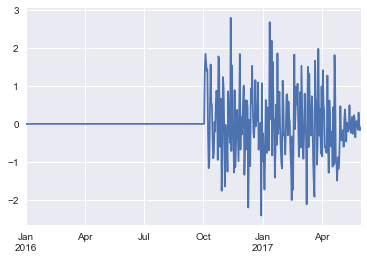

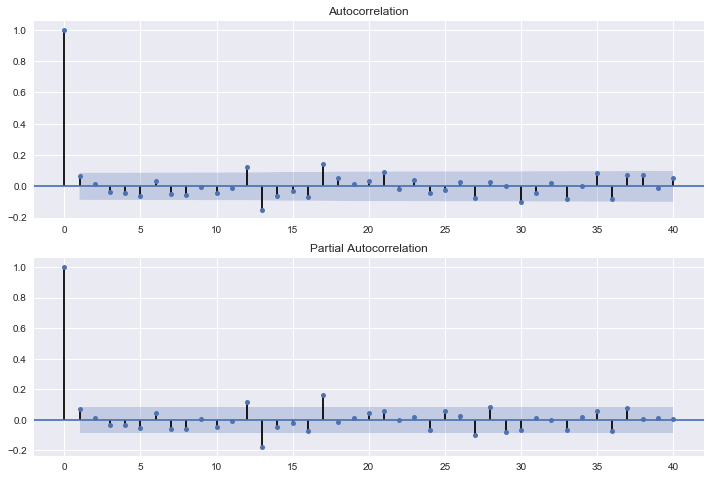

In [213]:
# univariate ARIMA model 1

model=sm.tsa.ARIMA(df['visitors'],(5,0,6))
results=model.fit()
print(results.summary())

results.resid.plot()
plt.show()
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(results.resid, lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(results.resid, lags=40, ax=ax2)
plt.show()

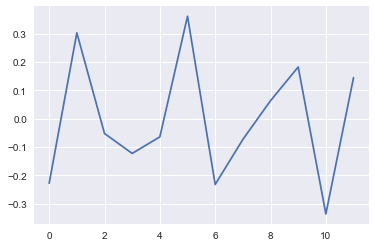

In [215]:
# forecasting
forecast,std,conf=results.forecast(12)
plt.plot(forecast)

In [220]:
# regaining actual values, taking shift and anti-log
print(df['visitors'][-1])
end = df['visitors'][-1]
l = len(forecast)
tmp = []
for i in range(l):
    x = forecast[i] + end
    x = np.exp(x) - 1
    tmp.append(x)
    end = np.log(1+x)
print(tmp)

0.0
[-0.20421500629555089, 0.076953723454227907, 0.02172350263306666, -0.096491998730248052, -0.15298849506614587, 0.21554427559999456, -0.036612548622363628, -0.10501928594611432, -0.04669542324649667, 0.14368102695678453, -0.18312899057495324, -0.056095608442691902]


In [221]:
forecast # generating wrong result

array([-0.22842624,  0.30256267, -0.05264552, -0.12296122, -0.06457069,
        0.36123294, -0.23249155, -0.0736535 ,  0.06313228,  0.18207286,
       -0.33652611,  0.14454368])